In [4]:
!pip install contractions
!pip install inflect
!pip install pandas-profiling==2.7.1

In [5]:
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet_ic')
nltk.download('omw-1.4')

NameError: name 'nltk' is not defined

In [7]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [ ]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('datos25k.csv', sep=',', index_col=0)
data_t = data
data_t

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if not word in stopwords.words():
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [ ]:
X_data, y_data = data_t['words'].fillna(' '),data_t['class']
y_data = (y_data == 'suicide').astype('int64')

y_data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(X_data)

vectors

In [ ]:
tf_idf = pd.DataFrame(vectors.todense()).iloc[:5]  
tf_idf.columns = vectorizer.get_feature_names_out()
tfidf_matrix = tf_idf.T
tfidf_matrix.columns = ['response'+ str(i) for i in range(1, 6)]
tfidf_matrix['count'] = tfidf_matrix.sum(axis=1)

# Top 10 words 
tfidf_matrix = tfidf_matrix.sort_values(by ='count', ascending=False)[:25] 

# Print the first 10 words 
print(tfidf_matrix.head(25))

In [ ]:
data_t.to_csv("datos.csv", sep=',', encoding = 'utf-8')

In [ ]:
copia=vectors
copia=pd.DataFrame.sparse.from_spmatrix(copia)
copia.head(7)
#copia.to_csv("/Users/Santiago_Talero/Desktop/Proyecto Etapa 1/vectores.csv", sep=',', encoding = 'utf-8')

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(copia, y_data, test_size=0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

error_rate = []
for i in range(1,33):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,33),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [149]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [150]:
confusion_matrix(Y_test, y_pred)

array([[4184,   21],
       [2577,  718]], dtype=int64)

C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


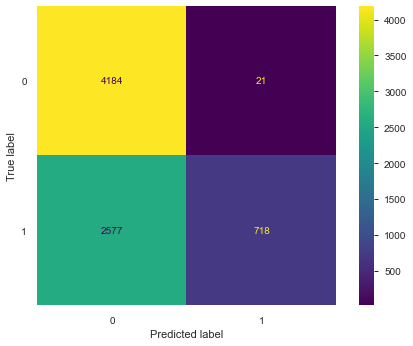

In [151]:
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [152]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.65
Recall: 0.21790591805766313
Precisión: 0.9715832205683356
Puntuación F1: 0.3559742191373327


In [100]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [101]:
confusion_matrix(Y_test, y_pred)

array([[4173,   32],
       [3194,  101]], dtype=int64)

C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


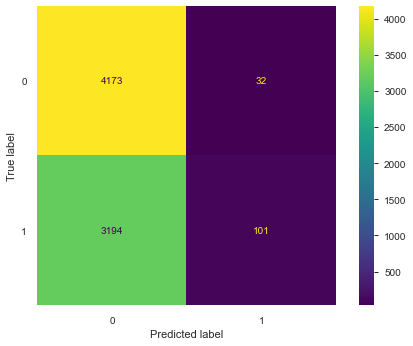

In [102]:
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [103]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.57
Recall: 0.030652503793626707
Precisión: 0.7593984962406015
Puntuación F1: 0.05892648774795799


In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [105]:
confusion_matrix(Y_test, y_pred)

array([[4142,   63],
       [3186,  109]], dtype=int64)

C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


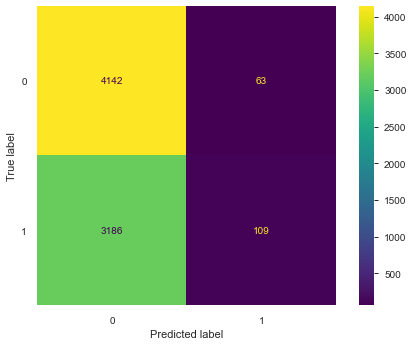

In [106]:
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [107]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.57
Recall: 0.0330804248861912
Precisión: 0.6337209302325582
Puntuación F1: 0.06287856936832997


In [129]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train,Y_train);

In [137]:
y_pred = rf.predict(X_test)

In [138]:
confusion_matrix(Y_test, y_pred)

array([[3880,  325],
       [ 443, 2852]], dtype=int64)

C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


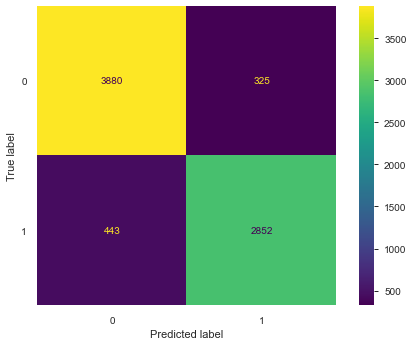

In [139]:
plot_confusion_matrix(rf, X_test, Y_test)  
plt.show()

In [140]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.90
Recall: 0.8655538694992413
Precisión: 0.8977022348127164
Puntuación F1: 0.8813349814585909


C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


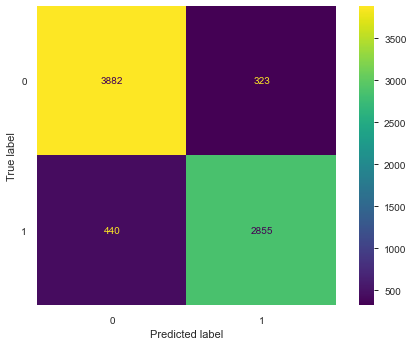

Exactitud: 0.90
Recall: 0.866464339908953
Precisión: 0.8983637507866583
Puntuación F1: 0.8821257531283795


C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


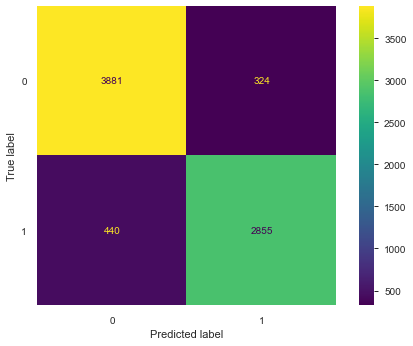

Exactitud: 0.90
Recall: 0.866464339908953
Precisión: 0.8980811575967286
Puntuación F1: 0.8819894964473278


C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


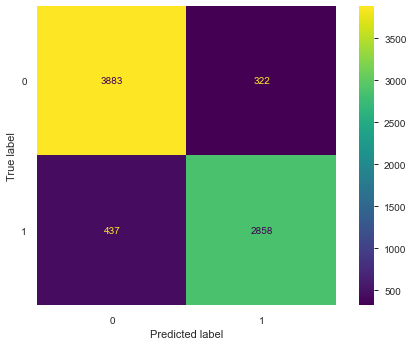

Exactitud: 0.90
Recall: 0.8673748103186646
Precisión: 0.8987421383647799
Puntuación F1: 0.8827799227799227


C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


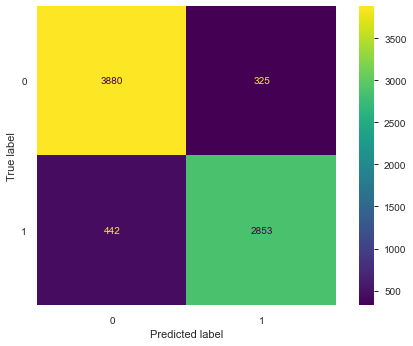

Exactitud: 0.90
Recall: 0.8658573596358118
Precisión: 0.8977344241661422
Puntuación F1: 0.8815078016375715


KeyboardInterrupt: 

In [172]:
rf = RandomForestClassifier(n_estimators = i, random_state = 42)
rf.fit(X_train,Y_train);
y_pred = rf.predict(X_test)
plot_confusion_matrix(rf, X_test, Y_test)  
plt.show()
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

C:\Users\juana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


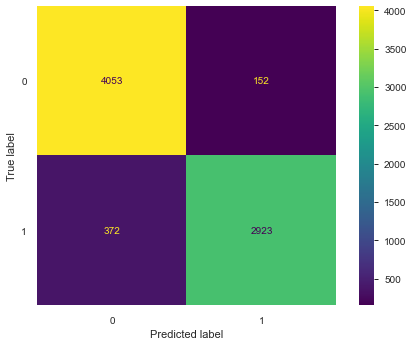

Exactitud: 0.93
Recall: 0.8871016691957512
Precisión: 0.9505691056910569
Puntuación F1: 0.9177394034536891


In [187]:
    from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_test, Y_test)
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, Y_test)  
plt.show()
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))


In [212]:
import seaborn as sns

In [ ]:
sns.pairplot(copia, height=3, x_vars = copia[1], kind='scatter')